# Exploratory Data Analysis of the FIFA 19 Dataset in Python

![](https://miro.medium.com/max/988/0*6BZ8GNWtYWBLZj-z)

## 💡  What is Exploratory Data Analysis?
**Exploratory Data Analysis** refers to the fundamental process of conducting initial assessment on a dataset in order to uncover patterns, spot anomalies, test various machine learning models, and validate assumptions using statistical results and mathematical visualisations.

##  OUTLINE 
- Download and Import libraries
- Data Preparation and Cleaning
 -  Selecting specific columns
 - Finding and Replacing The Null Values In Our Dataset
 - Adding more detailed columns
- Exploratory Analysis and visualization
(investigate on what we can get out of these datasets):
 - Wage
 - Country 
 - Position 
 - Weight
 - Height
 - Factors effecting the players
- Asking and Answering Questions 
 - Who are the top 10 most paid players?
 - Who are the most rated players?
 - How many differrent country players are playing and which country contributes most players?
 - Which are the top most played position?
 - Does every position players are paid equally?
 - Compare left foot and right foot players.
 - Is there any age difference between different country players?
 - Does age effect on wages?
 
- Summary and Conclusion
- Future Works
- References



## Download and Import libraries

In [ ]:
!pip install jovian --upgrade --quiet
import jovian
jovian.commit(project= "MY EDA PROJECT")

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/ram9008478075/my-eda-project


'https://jovian.ai/ram9008478075/my-eda-project'

In [ ]:
!pip install opendatasets --upgrade --quiet
import opendatasets as od
download_url ="https://www.kaggle.com/karangadiya/fifa19"
od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ram2409
Your Kaggle Key: ··········


100%|██████████| 2.18M/2.18M [00:00<00:00, 43.2MB/s]

In [ ]:
data_filename = './fifa19/data.csv'

In [ ]:
!pip install plotly --quiet --upgrade
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

     |████████████████████████████████| 26.5 MB 58.1 MB/s 


## ✔️ Data Preparation and Cleaning
![Data Cleaning](https://assets-global.website-files.com/5def931741c660234d9a1d42/5e73a3e84d799433c0f75320_data-cleaning.jpg)
1. Load the file using pandas
2. Look for some of the information about the data and the columns
3. Fix any of the missing or incorrect values

In [ ]:
df = pd.read_csv(data_filename)

In [ ]:
df

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,https://cdn.sofifa.org/teams/2/light/121.png,€60K,€1K,1307,Right,1.0,2.0,2.0,Medium/ Medium,Lean,

- Now Let us check all the column names in the dataset `df`, so that we get an idea of the values stored in the dataset.

In [ ]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

- Let us check the number of columns and rows

In [ ]:
#for columns
len(df.columns)


89

In [ ]:
#for rows
len(df)

18207

### Selecting specific columns

- We can filter the dataframe so it only includes selected columns 

In [ ]:
df1 = df[['Name', 'Age', 'Nationality', 'Value', 'Wage', 'Preferred Foot', 'Height', 'Weight', 'Position', 'Overall']]

In [ ]:
df1

,Name,Age,Nationality,Value,Wage,Preferred Foot,Position,Overall,Height_cm,Weight_kg
0,L. Messi,31,Argentina,€110.5M,565000,Left,RF,94,170.18,72.121273
1,Cristiano Ronaldo,33,Portugal,€77M,405000,Right,ST,94,187.96,83.007502
2,Neymar Jr,26,Brazil,€118.5M,290000,Right,LW,92,175.26,68.038936
3,De Gea,27,Spain,€72M,260000,Right,GK,91,193.04,76.203609
4,K. De Bruyne,27,Belgium,€102M,355000,Right,RCM,91,180.34,69.853308
...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19,England,€60K,1000,Right,CM,47,175.26,60.781450
18203,N. Christoffersson,19,Sweden,€60K,1000,Right,ST,47,190.50,77.110795
18204,B. Worman,16,England,€60K,1000,Right,ST,47,172.72,67.131751
18205,D. Walker-Rice,17,England,€60K,1000,Right,RW,47,177.80,69.853308


- Now let us use `.info()` method to summarise the datatypes of all the columns in our dataset.

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            18207 non-null  object
 1   Age             18207 non-null  int64 
 2   Nationality     18207 non-null  object
 3   Value           18207 non-null  object
 4   Wage            18207 non-null  object
 5   Preferred Foot  18159 non-null  object
 6   Height          18159 non-null  object
 7   Weight          18159 non-null  object
 8   Position        18147 non-null  object
 9   Overall         18207 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 1.4+ MB


- Clearly, there are  **2** predominant **data type** in our dataset:
1.  **int64** (Integer Numbers)

- Now, we will use the `.describe() ` method to calculate some of the basic statistical values like percentile, mean and std of the Dataset.

In [ ]:
df1.describe()

,Age,Wage,Overall,Height_cm,Weight_kg
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000
mean,25.122206,9731.312133,66.238699,181.257584,75.286956
std,4.669943,21999.290406,6.908930,6.721268,7.063700
min,16.000000,0.000000,46.000000,154.940000,49.895220
25%,21.000000,1000.000000,62.000000,175.260000,69.853308
50%,25.000000,3000.000000,66.000000,180.340000,74.842830
75%,28.000000,9000.000000,71.000000,185.420000,79.832352
max,45.000000,565000.000000,94.000000,205.740000,110.223077


### ⚠️ Finding and Replacing The Null Values In Our Dataset

Let us find all the missing values in the dataset using the `isna()` method:
- Note you can also use the `isnull()`in place of `isna()`

In [ ]:
df1.isna()

,Name,Age,Nationality,Value,Wage,Preferred Foot,Position,Overall,Height_cm,Weight_kg
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
18202,False,False,False,False,False,False,False,False,False,False
18203,False,False,False,False,False,False,False,False,False,False
18204,False,False,False,False,False,False,False,False,False,False
18205,False,False,False,False,False,False,False,False,False,False


Look `.isna()`  has retured a dataframe having bool values. Neverthless, since our dataset is quite large this output is difficult to interpret and make sense of. So, let us try and make a few visualisations that will give us a clearer picture of the extent of missing values present in our dataset.

- Lets add up all the null values using the `.sum()` method

In [ ]:
df1.isnull().sum()

Name               0
Age                0
Nationality        0
Value              0
Wage               0
Preferred Foot    48
Height            48
Weight            48
Position          60
Overall            0
dtype: int64

Now, let us make some insightful visualisations and checkout the percentage of the data that is actually missing in the dataset. 

In [ ]:
missing_percentage= 100*(df1.isna().sum().sort_values(ascending=False)/len(df1))
missing_percentage[missing_percentage!=0]

Position          0.329544
Weight            0.263635
Height            0.263635
Preferred Foot    0.263635
dtype: float64

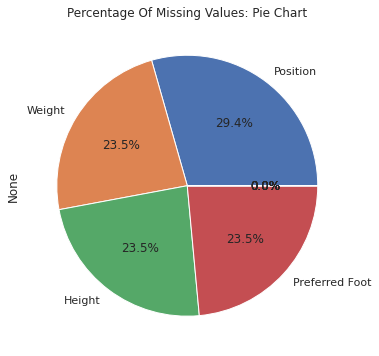

In [ ]:
plt.title("Percentage Of Missing Values: Pie Chart")
missing_percentage.plot(figsize=(12,6),kind="pie",autopct='%1.1f%%');

**Observation**

From the graphs we can conclude that `Height`, `Weight`,`Preferred Foot` and `Position` are the columns which are having null values

First we will fill `Preferred Foot` and `Position` columns with it's most frequent value 

In [ ]:
df1['Preferred Foot'].value_counts()[:1]

Right    13948
Name: Preferred Foot, dtype: int64

In [ ]:

df1['Position'].value_counts()[:1]

ST    2152
Name: Position, dtype: int64

In [ ]:
df1['Preferred Foot'].fillna(value='Right', inplace=True)
df1['Position'].fillna(value='ST', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


### Adding more detailed columns

Now let us fill all the null values in columns  `Height` and `Weight` with the mean column parameters: 

First we will convert height into numerical values in cm's



In [ ]:
Heights_cm = []

for i in list(df1['Height'].values):
  try:
    Heights_cm.append((float(str(i)[0]) * 12.0 + float(str(i)[2:])) * 2.54 )
  except(ValueError):
    Heights_cm.append(np.nan)
df1['Height_cm'] = Heights_cm

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Now we can see that we have created a `Heights_cm` column

In [ ]:
df1

,Name,Age,Nationality,Value,Wage,Preferred Foot,Height,Weight,Position,Overall,Height_cm
0,L. Messi,31,Argentina,€110.5M,€565K,Left,5'7,159lbs,RF,94,170.18
1,Cristiano Ronaldo,33,Portugal,€77M,€405K,Right,6'2,183lbs,ST,94,187.96
2,Neymar Jr,26,Brazil,€118.5M,€290K,Right,5'9,150lbs,LW,92,175.26
3,De Gea,27,Spain,€72M,€260K,Right,6'4,168lbs,GK,91,193.04
4,K. De Bruyne,27,Belgium,€102M,€355K,Right,5'11,154lbs,RCM,91,180.34
...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19,England,€60K,€1K,Right,5'9,134lbs,CM,47,175.26
18203,N. Christoffersson,19,Sweden,€60K,€1K,Right,6'3,170lbs,ST,47,190.50
18204,B. Worman,16,England,€60K,€1K,Right,5'8,148lbs,ST,47,172.72
18205,D. Walker-Rice,17,England,€60K,€1K,Right,5'10,154lbs,RW,47,177.80


Now we'll fill null values in height column by it's mean value and we will delete another height column

In [ ]:
df1['Height_cm'].fillna(value = df1['Height_cm'].mean(),inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
df1.drop(['Height'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df1['Height_cm'].isna().sum()

0

Now we can see that there is no null value in `Heights_cm` column

We'll convert weight into kilogram

In [ ]:
df1['Weight_kg'] = df1['Weight'].str[:3].astype(float) / 2.20462

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


We don't require two weight columns so we will drop one column

In [ ]:
df1.drop(['Weight'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df1

,Name,Age,Nationality,Value,Wage,Preferred Foot,Position,Overall,Height_cm,Weight_kg
0,L. Messi,31,Argentina,€110.5M,565000,Left,RF,94,170.18,72.121273
1,Cristiano Ronaldo,33,Portugal,€77M,405000,Right,ST,94,187.96,83.007502
2,Neymar Jr,26,Brazil,€118.5M,290000,Right,LW,92,175.26,68.038936
3,De Gea,27,Spain,€72M,260000,Right,GK,91,193.04,76.203609
4,K. De Bruyne,27,Belgium,€102M,355000,Right,RCM,91,180.34,69.853308
...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19,England,€60K,1000,Right,CM,47,175.26,60.781450
18203,N. Christoffersson,19,Sweden,€60K,1000,Right,ST,47,190.50,77.110795
18204,B. Worman,16,England,€60K,1000,Right,ST,47,172.72,67.131751
18205,D. Walker-Rice,17,England,€60K,1000,Right,RW,47,177.80,69.853308


We'll fill null values in weight column by it mean value

In [ ]:
df1['Weight_kg'].fillna(value = df1['Weight_kg'].mean(), inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
df1['Weight_kg'].isna().sum()

0

There is no any null value as we replaced it with it's mean value

In [ ]:
df1.isnull().sum()

Name              0
Age               0
Nationality       0
Value             0
Wage              0
Preferred Foot    0
Position          0
Overall           0
Height_cm         0
Weight_kg         0
dtype: int64

We can see that there is no any null value in our dataframe.

## 📈 Exploratory Analysis and Visualisations
![pic](https://drive.google.com/uc?id=1D30aMTa8theQYPx0tkezp7tjGQi0fJOA)

### Wage.


We have convert wages column into complete numeric by replacing k with 1000 so it easier to comparing and visualising

In [ ]:
wg = df1['Wage'].str.replace(r'\D+', '')
df1['Wage'] = wg.astype(int) * 1000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#top 20 highest earning players
top_20 = df1.nlargest(20,'Wage')[['Name', 'Age', 'Position', 'Wage', 'Overall', 'Nationality']]
top_20

,Name,Age,Position,Wage,Overall,Nationality
0,L. Messi,31,RF,565000,94,Argentina
7,L. Suárez,31,RS,455000,91,Uruguay
6,L. Modrić,32,RCM,420000,91,Croatia
1,Cristiano Ronaldo,33,ST,405000,94,Portugal
8,Sergio Ramos,32,RCB,380000,91,Spain
4,K. De Bruyne,27,RCM,355000,91,Belgium
11,T. Kroos,28,LCM,355000,90,Germany
36,G. Bale,28,ST,355000,88,Wales
5,E. Hazard,27,LF,340000,91,Belgium
32,Coutinho,26,LW,340000,88,Brazil


In [ ]:
px.line(top_20,x='Name',y='Wage',title='Top most paid players')

**Observation**

From this graph we can analyze that L. Messi is the highest earner followed by L. Suarez, L.Modric and other players.

### Country.

In [ ]:
df1['Nationality'].nunique()

164

There are players from 164 different countries in the dataset. Top 20 countries, that contribute most number of players in the dataset.

In [ ]:
!pip install wordcloud --upgrade --quiet

     |████████████████████████████████| 366 kB 7.8 MB/s 


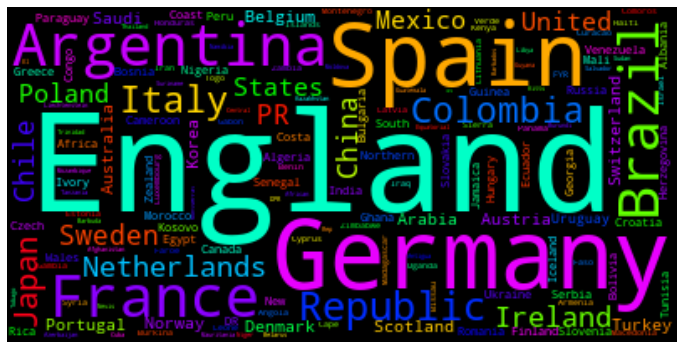

In [ ]:
countries = " ".join(n for n in df1['Nationality'])
from wordcloud import WordCloud
plt.figure(figsize=(12, 11))
wc = WordCloud(background_color='black',colormap='gist_rainbow',collocations=False).generate(countries)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

**Observation**

From this graph we can conclude that top  most of the players are from England, Germany and Spain

### Position.

We will plot most played position in below visualisation.

In [ ]:
fig = px.bar(df1['Position'].value_counts()[:20])
fig.update_layout(xaxis_title='Position', yaxis_title='No of players',title='Most positioned players',showlegend=False)

**Observation**

From this graph we can conclude that most players are `ST` means Strikers, `GK` means Goalkeeper and others as well

### Weight

In [ ]:
fig = px.box(df1['Weight_kg'])
fig.update_layout(title='Weight in kg')

**Observation**

From this boxplot we got know the distrubution of weight of different players like the lowest weight is 49, highest weight is 110, median weight is 75 and other things as well.

### Height

In [ ]:
fig = px.histogram(df1,x=df1['Height_cm'],nbins=15)
fig.update_layout(title='Height in cm',bargap=0.1)

**Observation**

As we see in the diagram most of the players height is between 175 to 190 cm as expected.

### Factors effecting the players

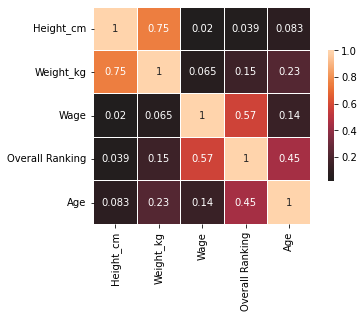

In [ ]:
selected_attr = ['Height_cm', 'Weight_kg', 'Wage', 'Overall', 'Age']
xlabels=['Height_cm', 'Weight_kg', 'Wage', 'Overall Ranking', 'Age']
corr = df1[selected_attr].corr()
sns.heatmap(corr,  center=0, annot=True,square=True, linewidths=.05, cbar_kws={"shrink": .6},xticklabels=xlabels,yticklabels=xlabels);

**Observation**

From this heatmap we can tell there is a strong positive correlation between height and weight, meaning that as height increases so does the weight and vice versa.
There is a moderately positive correlation between Wages of a player and their overall ranking.
There is a good correlation between player's age and overall ranking. 


## ASK & Answer Questions
### Questions
 - Who are the top 10 most paid players?
 - Who are the most rated players?
 - How many differrent country players are playing and which country contributes most players?
 - Which are the top most played position?
 - Does every position players are paid equally?
 - Compare left foot and right foot players.
 - Is there any age difference between different country players?
 - Does age effect on wages?

### Q1. Who are the top 10 most paid players?

We will find the name and wage of the top 10 most paid players

In [ ]:
top_10 = df1.nlargest(10,'Wage')[['Name', 'Wage']]
top_10

,Name,Wage
0,L. Messi,565000
7,L. Suárez,455000
6,L. Modrić,420000
1,Cristiano Ronaldo,405000
8,Sergio Ramos,380000
4,K. De Bruyne,355000
11,T. Kroos,355000
36,G. Bale,355000
5,E. Hazard,340000
32,Coutinho,340000


In [ ]:
px.histogram(top_10, x=top_10['Name'], y=top_10['Wage'],title='Top 10 most paid players')

**Observation**

From this graph we got to know who are the top most paid players as it shows L. Messi is the highest earner as he earns 565k per week followed L. Suarez , L.Modric and others as shown in graph.

### Q2. Who are the most rated players?

In [ ]:
top_10 = df1.nlargest(10,'Overall')[['Name', 'Overall']]
top_10

,Name,Overall
0,L. Messi,94
1,Cristiano Ronaldo,94
2,Neymar Jr,92
3,De Gea,91
4,K. De Bruyne,91
5,E. Hazard,91
6,L. Modrić,91
7,L. Suárez,91
8,Sergio Ramos,91
9,J. Oblak,90


In [ ]:
px.line(top_10, x=top_10['Name'],y=top_10['Overall'],title='Top 10 most rated players')

**Observation**

From this plot we conclude that L. Messi, Cristiano Ronaldo and Neymar Jr are top 3 most rated players based on their skills.

### Q3. How many different country players are playing and which country contributes most players?

In [ ]:
df1['Nationality'].nunique()

164

As we can see there are players from **164** different countries.

In [ ]:
fig = px.bar(y=df1['Nationality'].value_counts().iloc[:10],x=df1['Nationality'].value_counts().iloc[:10].index)
fig.update_layout(xaxis_title='Country',yaxis_title='Count players',title='Top 10 country players')
fig.show()

**Observation**

As we expected most of the players are from England, Germany, Spain and followed by other countries as well.

### Q4. Which are the most played positions?

In [ ]:
fig = px.bar(y=df1['Position'].value_counts(),x=df1['Position'].value_counts().index)
fig.update_layout(xaxis_title='Position',yaxis_title='Count players',title='Most played position')

**Observation**

We can conclude that most players are `ST` which means strikers, `GK` means goalkeepers followed by `CB` known as centre back players followed by other position as shown in the plot.

### Q5. Does every position players are paid equally?

In [ ]:
px.scatter(df1, x='Position',y='Wage',title='Wage of different positioned players')

**Observation**

In this plot we can conclude that a player who plays at `RF` paid more compare to others because they are less players at that position

### Q6. Compare left foot and right foot players on their wages.

In [ ]:
px.scatter(df1,x="Preferred Foot", y ="Wage",title='Wage comparison of different foot')

**Observation**

In this plot it seems to be approximately the same for both the values of preferred foot. So we can say that preferred foot does not affect the wages of a player much.

### Q7. Is there any age distrubution difference in different country players?

We will concentrate main on England, Germany and Spain as most of the players are from these countries.

In [ ]:
df2 = df1[df1['Nationality'].isin(['England', 'Germany', 'Spain'])]

In [ ]:
px.box(df2,x=df2['Nationality'], y=df2['Age'],title='Distrubution of age in top 3 countries')

**Observation**

As we can see in the boxplot that spanish players have career bit long compare to Germany and England.We can observe other facors as well like median age which is almost 23-25 for these countries.



### Q8. Does age effect on wages?

In [51]:
px.scatter(df1,x=df1['Age'],y=df1['Wage'],title='Age consideration in wage')

**Observation**

As we can see top most earning players are almost within 25 to 33 in age as expected because in that age most of the players can give their best performance. We can conclude that no player who crossed 35 is getting high wages which means old players(above 35) are not getting high wages by this we can say age effects wages.

## Inference

- We observed that most of the high paid players are having high overall ranking.
- About 164 different country players are in our data, most of them are from England, Germany and Spain.
- Physical factors are also effects in overall rankings.
- We got know differet position players  and every position players are not paid equally.
- Age is also matters in wage.


## Future work

- Want to analyse other players who plays different sport like cricket, basketball, tennis etc. 

- Analyzing club wise like we done player wise in this notebook.

- Want to analyze female players as well

## Summary

We have done the detailed analysis of players by selecting some factors like nationality, position, wage, height, weight etc.
There is still room for improvement and advanced visulisations that with which even more minute insights can be pulled out of our dataset. I will continue working and updating this note book as and when I find some time. Yes thanks for spending your valuable time on reading this notebook!


## Reference

- [visualization with ploty](https://jovian.ai/landryroni/interactive-visualization-plotly)
- [kaggle for dataset download](https://www.kaggle.com/karangadiya/fifa19)
- [seaborn](https://seaborn.pydata.org/tutorial.html)
- [matplotlib](https://matplotlib.org/3.3.1/users/index.html)
- [pandas](https://pandas.pydata.org/docs/user_guide/index.html)

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/ram9008478075/my-eda-project


'https://jovian.ai/ram9008478075/my-eda-project'